In [1]:
import gym
from MonteCarlo_Agent import MonteCarlo_Agent
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

In [2]:
env = gym.make('Taxi-v3').env

mc_agent = MonteCarlo_Agent(env)

In [5]:
q_table_0g99, policy_0g99, all_epochs_0g99, acc_return_0g99 = mc_agent.train_agent(gamma = 0.99, epsilon = 0.9, max_episode = 20000, policy=None)
q_table_0g95, policy_0g95, all_epochs_0g95, acc_return_0g95 = mc_agent.train_agent(gamma = 0.95, epsilon = 0.9, max_episode = 20000, policy=None)
q_table_0g9, policy_0g9, all_epochs_0g9, acc_return_0g9 = mc_agent.train_agent(gamma = 0.9, epsilon = 0.9, max_episode = 20000, policy=None)

100%|██████████| 20000/20000 [06:05<00:00, 54.69it/s] 


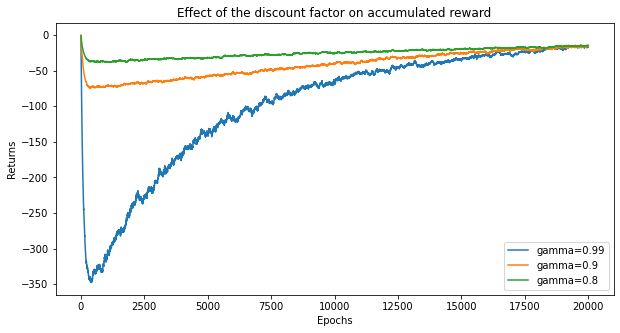

In [6]:
plt.figure(figsize=(10, 5),)
plt.plot(acc_return_0g99)
plt.plot(acc_return_0g95)
plt.plot(acc_return_0g9)
plt.xlabel('Epochs')
plt.ylabel('Returns')
plt.title('Effect of the discount factor on accumulated reward')
plt.legend(['gamma=0.99', 'gamma=0.9', 'gamma=0.8'])
plt.show()

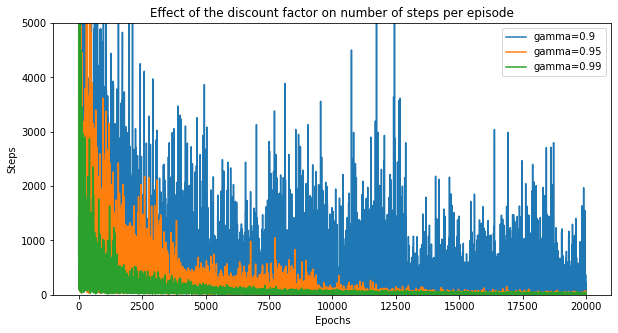

In [8]:
plt.figure(figsize=(10, 5),)
plt.plot(all_epochs_0g9)
plt.plot(all_epochs_0g95)
plt.plot(all_epochs_0g99)
plt.xlabel('Epochs')
plt.ylabel('Steps')
plt.title('Effect of the discount factor on number of steps per episode')
plt.ylim([0, 5000])
plt.legend(['gamma=0.9', 'gamma=0.95', 'gamma=0.99'])
plt.show()

In [9]:
def save_frames_as_gif(frames, path="./", filename='gym_animation.gif'):

    #Mess with this to change frame size
    plt.figure(figsize=(frames[0].shape[1] / 300.0, frames[0].shape[0] / 300.0), dpi=300)

    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    anim.save(path + filename, writer='Pillow', fps=5)

MovieWriter Pillow unavailable; using Pillow instead.


Results after 5 episodes:
Average timesteps per episode: 11.4
Average penalties per episode: 0.0


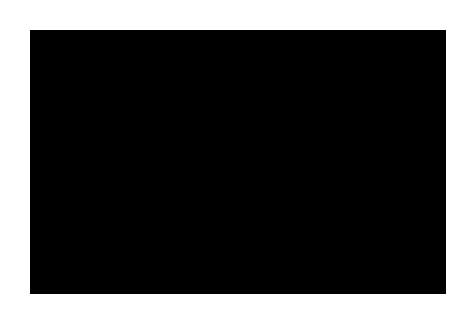

In [10]:
# Evaluate agent's performance after Q-learning
total_epochs, total_penalties = 0, 0
episodes = 5
frames = []
for _ in range(episodes):
    state = env.reset()
    frames.append(env.render(mode="rgb_array"))
    epochs, penalties, reward = 0, 0, 0

    done = False

    while not done:
        action = policy_0g99[state]
        state, reward, done, info = env.step(action)
        frames.append(env.render(mode="rgb_array"))
        
        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

    for end_frame in range(5):
        frames.append(np.zeros(np.shape(frames[0])))

save_frames_as_gif(frames,filename='Taxi_MC.gif')

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

In [11]:
env.close()